In [1]:
#imports
import pandas as pd
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Read CSV file
df = pd.read_csv(os.environ['TRAIN_LOCATION'])


# View result
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [2]:
#Check for missing and duplicates
print(df.duplicated().sum()) # no duplicates
df.isna().sum() #We have alot of missing data that we will deal with in different ways

0


id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [3]:
from utils.helpers import preprocessing
df = preprocessing(df)
df.sample(5)

,id,name,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
80066,80066,Pratyush,1,44.0,Surat,1,Content Writer,NaN,2.0,NaN,NaN,1.0,7-8 hours,1,M.Ed,0,6.0,2.0,1,0
136457,136457,Rupal,0,54.0,Srinagar,1,Teacher,NaN,4.0,NaN,NaN,5.0,7-8 hours,1,B.Ed,1,3.0,2.0,0,0
64537,64537,Pooja,0,31.0,Chennai,0,Student,5.0,NaN,5.52,5.0,NaN,5-6 hours,2,M.Ed,1,3.0,3.0,0,1
136759,136759,Anvi,0,24.0,Kalyan,0,Student,3.0,NaN,8.58,3.0,NaN,More than 8 hours,1,MBBS,0,6.0,3.0,0,0
23995,23995,Nikita,0,56.0,Vadodara,1,Judge,NaN,1.0,NaN,NaN,5.0,More than 8 hours,2,LLB,0,12.0,3.0,1,0


In [4]:
#Now we want to split it into 2 datasets, students and workers
students_df = df.loc[df["working_student"] == 0].drop({"working_student", "work_pressure", "job_satisfaction"}, axis=1)
working_df = df.loc[df["working_student"] == 1].drop({"working_student", "study_satisfaction", "cgpa", "academic_pressure"}, axis=1)

print(f"Students: {round((students_df['depression'] == 1).sum() / (df['depression'] == 1).sum() * 100)}% depressed, Working: {round((working_df['depression'] == 1).sum() / (df['depression'] == 1).sum() * 100)}% depressed")

display(students_df.sample(5))

Students: 64% depressed, Working: 36% depressed


,id,name,gender,age,city,profession,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
114446,114446,Atharv,1,25.0,Hyderabad,Student,3.0,5.24,2.0,Less than 5 hours,1,MBA,1,2.0,5.0,1,1
66212,66212,Ayansh,1,26.0,Kolkata,Student,1.0,9.89,3.0,7-8 hours,0,MSc,1,0.0,5.0,1,0
114813,114813,Darsh,1,21.0,Srinagar,Student,1.0,8.04,3.0,7-8 hours,0,B.Arch,1,11.0,5.0,0,1
28489,28489,Yogesh,1,24.0,Vasai-Virar,Student,3.0,7.09,2.0,More than 8 hours,1,Class 12,1,4.0,5.0,1,1
85259,85259,Shlok,1,23.0,Agra,Student,1.0,8.21,4.0,More than 8 hours,2,B.Ed,0,0.0,3.0,1,0


In [5]:
# from OurModels import RandomForestRegressorModel
# model = RandomForestRegressorModel()
# studentModelResults = model.train(working_df)
# model.output(*studentModelResults)

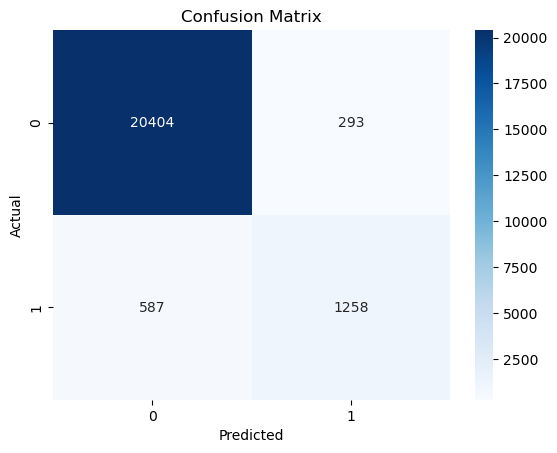

R^2 Score: 0.4805169909939423


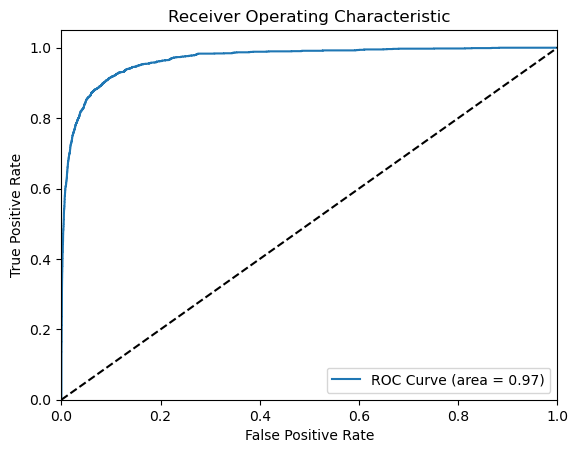

In [6]:
from OurModels import LogisticRegressionModel
model = LogisticRegressionModel()
studentModelResults = model.train(working_df)
model.output(*studentModelResults)

In [7]:
df.head()


,id,name,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
0,0,Aaradhya,0,49.0,Ludhiana,1,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,2,BHM,0,1.0,2.0,0,0
1,1,Vivan,1,26.0,Varanasi,1,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,0,LLB,1,7.0,3.0,0,1
2,2,Yuvraj,1,33.0,Visakhapatnam,0,Student,5.0,NaN,8.97,2.0,NaN,5-6 hours,2,B.Pharm,1,3.0,1.0,0,1
3,3,Yuvraj,1,22.0,Mumbai,1,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,1,BBA,1,10.0,1.0,1,1
4,4,Rhea,0,30.0,Kanpur,1,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,0,BBA,1,9.0,4.0,1,0
